In [1]:
# Import
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sklearn
import scipy.stats as stats
import seaborn as sns
import datetime 
import statsmodels

In [2]:
import pandas as pd
df = pd.read_csv('googl.txt')
df=df.dropna()

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [4]:
# Prophet requires specific input format.  
# Columns names must be lowercase, date as 'ds', data as 'y'
#goog_prophet = df.Open.dropna().reset_index()
goog_prophet = df.rename(columns={'Date': 'ds', 'Open': 'y'})
goog_prophet.head()

,ds,y,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [5]:
goog_prophet=goog_prophet[['ds','y']]

In [6]:

# Model with default parameters
goog_model = Prophet(daily_seasonality=False)
goog_model.fit(goog_prophet)
goog_future = goog_model.make_future_dataframe(periods=365)
goog_forecast = goog_model.predict(goog_future)

C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [7]:
goog_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-08-19,50.747891,11.791292,82.045707,50.747891,50.747891,-4.323863,-4.323863,-4.323863,0.614555,0.614555,0.614555,-4.938418,-4.938418,-4.938418,0.0,0.0,0.0,46.424029
1,2004-08-20,51.026340,11.955789,80.027807,51.026340,51.026340,-4.850797,-4.850797,-4.850797,0.592062,0.592062,0.592062,-5.442860,-5.442860,-5.442860,0.0,0.0,0.0,46.175543
2,2004-08-23,51.861687,11.754430,79.708757,51.861687,51.861687,-7.043071,-7.043071,-7.043071,-0.170301,-0.170301,-0.170301,-6.872769,-6.872769,-6.872769,0.0,0.0,0.0,44.818617
3,2004-08-24,52.140136,10.739079,78.233248,52.140136,52.140136,-7.530999,-7.530999,-7.530999,-0.225368,-0.225368,-0.225368,-7.305631,-7.305631,-7.305631,0.0,0.0,0.0,44.609137
4,2004-08-25,52.418585,8.833096,78.967225,52.418585,52.418585,-7.416975,-7.416975,-7.416975,0.291146,0.291146,0.291146,-7.708122,-7.708122,-7.708122,0.0,0.0,0.0,45.001610
5,2004-08-26,52.697034,10.993016,79.121559,52.697034,52.697034,-7.460534,-7.460534,-7.460534,0.614555,0.614555,0.614555,-8.075088,-8.075088,-8.075088,0.0,0.0,0.0,45.236501
6,2004-08-27,52.975483,12.050483,79.246288,52.975483,52.975483,-7.809459,-7.809459,-7.809459,0.592062,0.592062,0.592062,-8.401521,-8.401521,-8.401521,0.0,0.0,0.0,45.166024
7,2004-08-30,53.810830,11.609764,82.059259,53.810830,53.810830,-9.263027,-9.263027,-9.263027,-0.170301,-0.170301,-0.170301,-9.092726,-9.092726,-9.092726,0.0,0.0,0.0,44.547803
8,2004-08-31,54.089279,9.541363,79.162541,54.089279,54.089279,-9.440264,-9.440264,-9.440264,-0.225368,-0.225368,-0.225368,-9.214895,-9.214895,-9.214895,0.0,0.0,0.0,44.649015
9,2004-09-01,54.367728,12.529342,78.654797,54.367728,54.367728,-8.987567,-8.987567,-8.987567,0.291146,0.291146,0.291146,-9.278713,-9.278713,-9.278713,0.0,0.0,0.0,45.380161


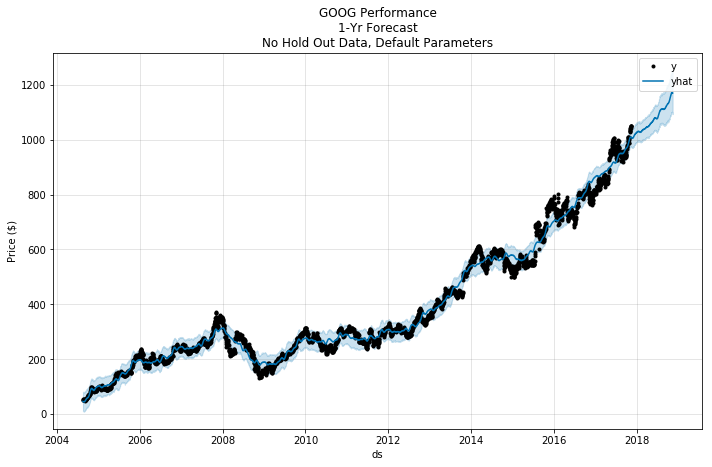

In [8]:

# Plot 
goog_model.plot(goog_forecast)
plt.title('GOOG Performance\n1-Yr Forecast\nNo Hold Out Data, Default Parameters')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

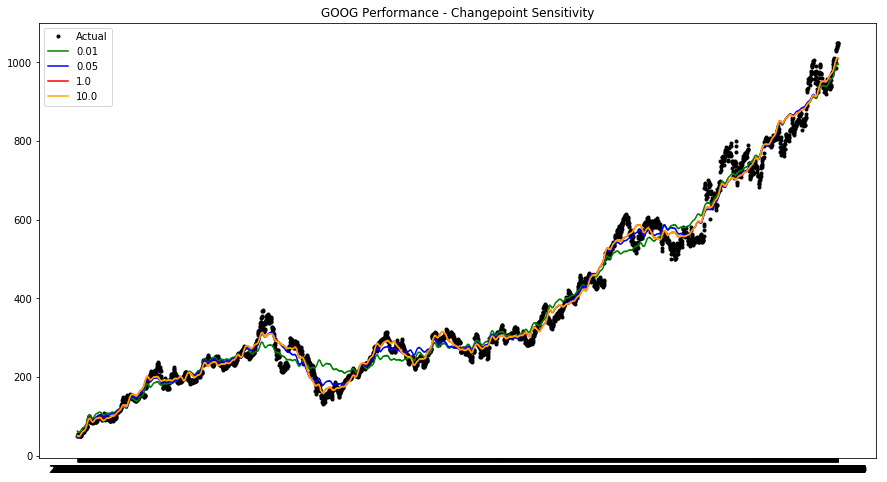

In [9]:
# Evaluate across range of changepoint sensitivity
changepoints = [0.01, 0.05, 1.0, 10.0]

for cp in changepoints:
    model = Prophet(daily_seasonality=False, changepoint_prior_scale=cp)
    model.fit(goog_prophet)
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    goog_prophet[cp] = forecast['yhat']

# Plot results
plt.figure(figsize=(15,8))

# Acual observations
plt.plot(goog_prophet['ds'], goog_prophet['y'], '.', color='black', label='Actual')

# Different changepoints
colors = {0.01: 'g', 0.05: 'b', 1.0: 'r', 10.0: 'orange'}
for cp in changepoints:
    plt.plot(goog_prophet['ds'], goog_prophet[cp], color=colors[cp], label=cp)

plt.title('GOOG Performance - Changepoint Sensitivity')
plt.legend()
plt.show()

In [10]:
# Refit iwth changepoint value of 0.05
goog_model = Prophet(daily_seasonality=False, changepoint_prior_scale=0.05)
goog_model.fit(goog_prophet[['ds', 'y']])
goog_future = goog_model.make_future_dataframe(periods=365)
goog_forecast = goog_model.predict(goog_future)

GOOGL Decomposition


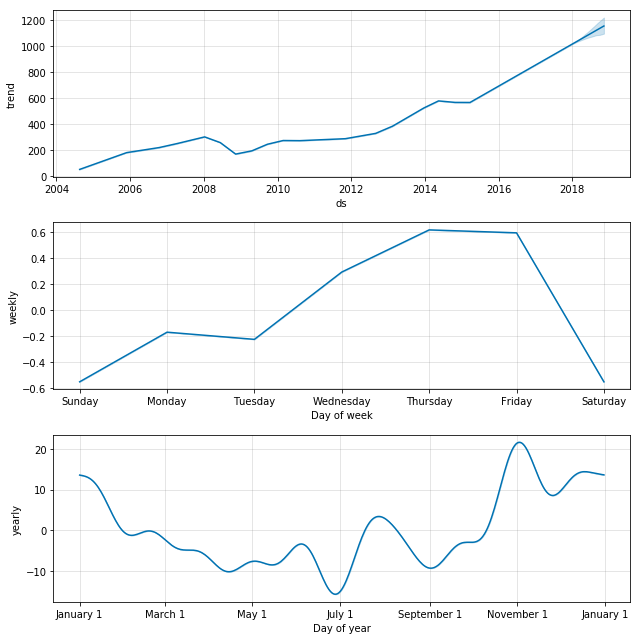

In [11]:
# Get decomposition components
print('GOOGL Decomposition')
goog_model.plot_components(goog_forecast)
plt.show()

In [14]:
# Validaate model predictions by splitting available data into train/test sets
# Take last 30 days as test data
train = df.dropna().reset_index()[:-30]
train = train.rename(columns={'Date': 'ds', 'Open': 'y'})

test = df.dropna().reset_index()[-30:]
test = test.rename(columns={'Date': 'ds', 'Open': 'y'})

train.head()

,index,ds,y,High,Low,Close,Volume,OpenInt
0,0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [37]:
train=train[['ds','y']]
test=test[['ds','y']]
test['ds'] =  pd.to_datetime(test['ds'])

In [39]:
#forecast=forecast.set_index(['ds'])
test.head()

,ds,y
3303,2017-10-02,975.65
3304,2017-10-03,967.56
3305,2017-10-04,971.76
3306,2017-10-05,972.79
3307,2017-10-06,980.00


In [17]:
# Fit model with training data, make 30 days of predictions 
train_model = Prophet(daily_seasonality=True, changepoint_prior_scale=0.05)
train_model.fit(train);
future = train_model.make_future_dataframe(periods=365)
forecast = train_model.predict(future)

In [18]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [22]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3663,2018-09-25,1122.939955,1052.984950,1188.919467,1064.350740,1184.169809,-2.590409,-2.590409,-2.590409,0.948374,...,-0.383712,-0.383712,-0.383712,-3.155072,-3.155072,-3.155072,0.0,0.0,0.0,1120.349546
3664,2018-09-26,1123.373008,1045.890395,1190.220471,1064.293225,1185.068655,-2.067622,-2.067622,-2.067622,0.948374,...,0.161570,0.161570,0.161570,-3.177566,-3.177566,-3.177566,0.0,0.0,0.0,1121.305385
3665,2018-09-27,1123.806060,1051.613078,1191.176313,1063.942819,1185.967502,-1.827754,-1.827754,-1.827754,0.948374,...,0.451830,0.451830,0.451830,-3.227959,-3.227959,-3.227959,0.0,0.0,0.0,1121.978306
3666,2018-09-28,1124.239113,1049.907415,1186.829803,1063.592412,1186.742356,-1.970737,-1.970737,-1.970737,0.948374,...,0.378416,0.378416,0.378416,-3.297528,-3.297528,-3.297528,0.0,0.0,0.0,1122.268375
3667,2018-09-29,1124.672165,1053.343185,1188.144344,1063.604554,1187.230896,-2.546528,-2.546528,-2.546528,0.948374,...,-0.118547,-0.118547,-0.118547,-3.376356,-3.376356,-3.376356,0.0,0.0,0.0,1122.125637


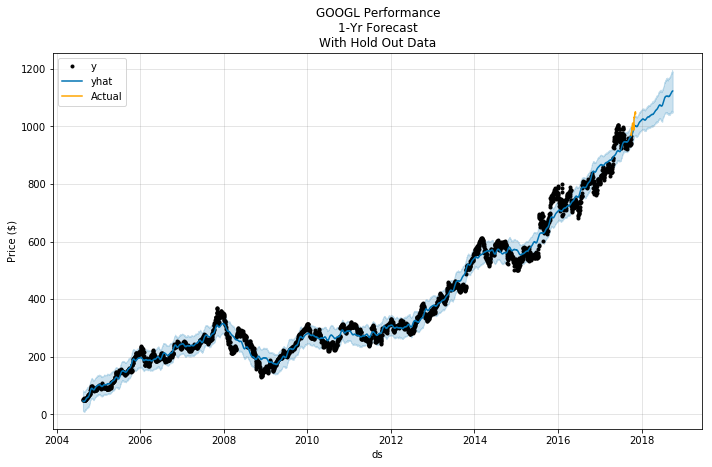

In [36]:
# Plot forecasted results based on training data.  Compare to actual.  
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
train_model.plot(forecast)
plt.plot(test['ds'], test['y'], label='Actual', color='orange')
plt.title('GOOGL Performance\n1-Yr Forecast\nWith Hold Out Data')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

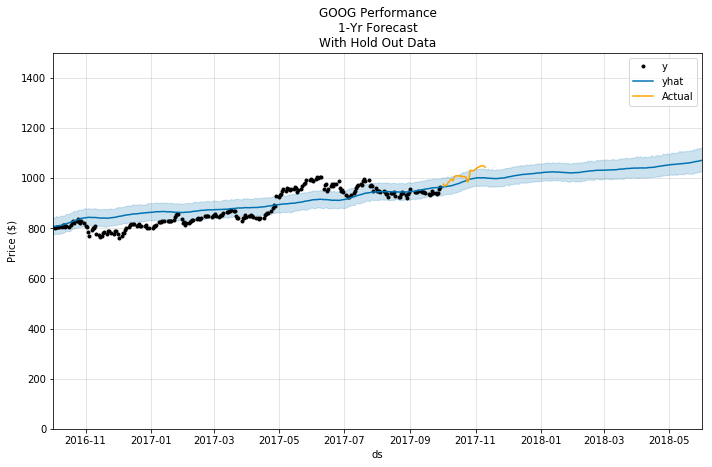

In [42]:
train_model.plot(forecast)
plt.plot(test['ds'], test['y'], label='Actual', color='orange')
plt.title('GOOG Performance\n1-Yr Forecast\nWith Hold Out Data')
plt.xlim([datetime.date(2016,10,2), datetime.date(2018, 6, 1)])
plt.ylim(0, 1500)
plt.ylabel('Price ($)')
plt.legend()
plt.show()


MSE: 874.2511544844543


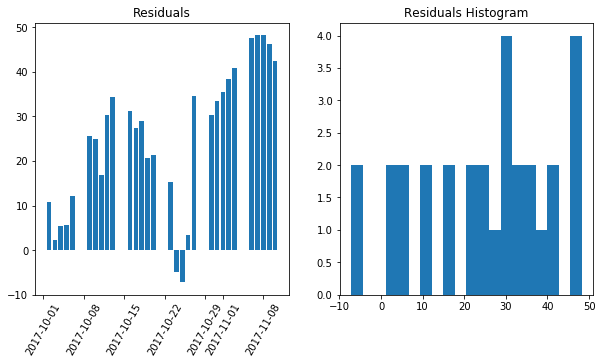

In [34]:
# Calculate MSE 
from sklearn.metrics import mean_squared_error
results = forecast[['ds', 'yhat']].merge(test, on='ds')
print('MSE:', mean_squared_error(results.y, results.yhat))

# Calculate residuals
results['residual'] = results['y'] - results['yhat']

# Plot results
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.bar(results.ds, results.residual)
plt.title('Residuals')
plt.xticks(rotation=60)

plt.subplot(122)
plt.hist(results.residual, bins=20)
plt.title('Residuals Histogram')

plt.show()